In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1

**Purpose: To gain experience with the apply function in R, while dealing with a concrete example of computing conditional probabilities.**

The eye-color hair-color data from Table 4.1 are built into R as the array named HairEyeColor. The array is frequencies of eye and hair color for males and females. Run the following code in R:

```
show( HairEyeColor ) # Show data
EyeHairFreq = apply( HairEyeColor, c("Eye","Hair"), sum ) # Sum across sex
EyeHairProp = EyeHairFreq / sum( EyeHairFreq ) # joint proportions, Table 4.1
show( round( EyeHairProp , 2 ) )
HairFreq = apply( HairEyeColor , c("Hair") , sum ) # Sum across sex and eye
HairProp = HairFreq / sum( HairFreq ) # marginal proportions, Table 4.1
show( round( HairProp , 2 ) )
EyeFreq = apply( HairEyeColor , c("Eye") , sum ) # Sum across sex and eye
EyeProp = EyeFreq / sum( EyeFreq ) # marginal proportions, Table 4.1
show( round( EyeProp , 2 ) )
EyeHairProp["Blue",] / EyeProp["Blue"] # conditional prob, Table 4.2
```

In your write-up, include each line above and its results. Explain what each line does (in a bit more detail than the inline comments). Extend the above commands by also computing the probabilities of the hair colors given Brown eyes, and the probabilities of the eye colors given Brown hair

*I will adapt the above R code to python code.*

In [2]:
hair_eye_color = pd.read_csv("./data/hair_eye_color.csv", index_col=0)
hair_eye_color.head()

,Hair,Eye,Sex,Freq
1,Black,Brown,Male,32
2,Brown,Brown,Male,53
3,Red,Brown,Male,10
4,Blond,Brown,Male,3
5,Black,Blue,Male,11


```
EyeHairFreq = apply( HairEyeColor, c("Eye","Hair"), sum ) # Sum across sex
EyeHairProp = EyeHairFreq / sum( EyeHairFreq ) # joint proportions, Table 4.1
show( round( EyeHairProp , 2 ) )
````

In [3]:
hair_eye_freq = hair_eye_color.groupby(["Hair", "Eye"]).agg("sum") # Removing `Sex` variable
hair_eye_freq["Prop"] = np.round(hair_eye_freq["Freq"] / hair_eye_freq["Freq"].sum(), 3) # Creating *proportion* column
hair_eye_freq.reset_index().pivot(index="Eye", columns="Hair", values="Prop") # Pivoting here just to visualize better

Hair,Black,Blond,Brown,Red
Eye,,,,
Blue,0.03,0.16,0.14,0.03
Brown,0.11,0.01,0.20,0.04
Green,0.01,0.03,0.05,0.02
Hazel,0.03,0.02,0.09,0.02


```
HairFreq = apply( HairEyeColor , c("Hair") , sum ) # Sum across sex and eye
HairProp = HairFreq / sum( HairFreq ) # marginal proportions, Table 4.1
show( round( HairProp , 2 ) )
```

In [4]:
hair_freq = hair_eye_color.groupby("Hair").sum() # Grouping by hair
hair_freq["Prop"] = np.round(hair_freq["Freq"] / hair_freq["Freq"].sum(), 3) # Getting the hair proportion

hair_freq

,Freq,Prop
Hair,,
Black,108,0.18
Blond,127,0.21
Brown,286,0.48
Red,71,0.12


```
EyeFreq = apply( HairEyeColor , c("Eye") , sum ) # Sum across sex and eye
EyeProp = EyeFreq / sum( EyeFreq ) # marginal proportions, Table 4.1
show( round( EyeProp , 2 ) )
```

In [5]:
eye_freq = hair_eye_color.groupby("Eye").sum() # Grouping by eye
eye_freq["Prop"] = np.round(eye_freq["Freq"] / eye_freq["Freq"].sum(), 3) # Getting the eye proportion

eye_freq

,Freq,Prop
Eye,,
Blue,215,0.36
Brown,220,0.37
Green,64,0.11
Hazel,93,0.16


```
EyeHairProp["Blue",] / EyeProp["Blue"] # conditional prob, Table 4.2
```


Here we get the conditional probability for hair colors given blue eyes


$p(h|e=blue)$

In [6]:
blue_eye_prop = hair_eye_freq.loc(axis=0)[:, "Blue"][["Prop"]] # Getting hair proportions joint to blue eyes
hair_conditial_blue_eye = blue_eye_prop / blue_eye_prop.sum() # Conditional prop given blue eyes

np.round(hair_conditial_blue_eye, 3).reset_index().pivot("Eye", "Hair", "Prop") # Pivoting to visualize

Hair,Black,Blond,Brown,Red
Eye,,,,
Blue,0.08,0.44,0.39,0.08


$p(h|e=brown)$

In [7]:
brown_eye_prop = hair_eye_freq.loc(axis=0)[:, "Brown"][["Prop"]] # Getting hair proportions joint to brown eyes
hair_conditial_brown_eye = brown_eye_prop / brown_eye_prop.sum() # Conditional prop given brown eyes

np.round(hair_conditial_brown_eye, 3).reset_index().pivot("Eye", "Hair", "Prop") # Pivoting to visualize

Hair,Black,Blond,Brown,Red
Eye,,,,
Brown,0.31,0.03,0.56,0.11


$p(e|h=brown)$

In [26]:
brown_hair_prop = hair_eye_freq.loc(axis=0)["Brown", :][["Prop"]]
eye_conditional_brown_hair = brown_hair_prop / brown_hair_prop.sum()

np.round(eye_conditional_brown_hair, 3).reset_index().pivot("Hair", "Eye", "Prop")

Eye,Blue,Brown,Green,Hazel
Hair,,,,
Brown,0.292,0.417,0.104,0.188


I'll extend the scope of the exercise a little bit, calculating all the possible $p(e|h)$ and all possible $p(h|e)$

In [22]:
hair_given_eye = hair_eye_freq.join(eye_freq, on="Eye", lsuffix="HairEye", rsuffix="Eye")
hair_given_eye["Conditional"] = np.round(hair_given_eye["PropHairEye"] / hair_given_eye["PropEye"], 3)

hair_given_eye.reset_index().pivot("Eye", "Hair", "Conditional")

Hair,Black,Blond,Brown,Red
Eye,,,,
Blue,0.083,0.444,0.389,0.083
Brown,0.297,0.027,0.541,0.108
Green,0.091,0.273,0.455,0.182
Hazel,0.188,0.125,0.562,0.125


In [29]:
eye_given_hair = hair_eye_freq.join(hair_freq, on="Hair", lsuffix="HairEye", rsuffix="Hair")
eye_given_hair["Conditional"] = np.round(eye_given_hair["PropHairEye"] / eye_given_hair["PropHair"], 3)

eye_given_hair.reset_index().pivot("Hair", "Eye", "Conditional")

Eye,Blue,Brown,Green,Hazel
Hair,,,,
Black,0.167,0.611,0.056,0.167
Blond,0.762,0.048,0.143,0.095
Brown,0.292,0.417,0.104,0.188
Red,0.250,0.333,0.167,0.167


## Exercise 2

**Purpose: To give you some experience with random number generation in R.**

Modify the coin flipping program in Section 4.5 RunningProportion.R to simulate a biased coin that has p(H) = 0.8. Change the height of the reference line in the plot to match p(H). Comment your code. Hint: Read the help for the sample command.

In [30]:
np.random.seed(123)

In [38]:
N = 100000

coin_tosses = (np.random.random_sample(N) < 0.8).astype("int")
cummean = np.cumsum(coin_tosses) / np.arange(1, N + 1)

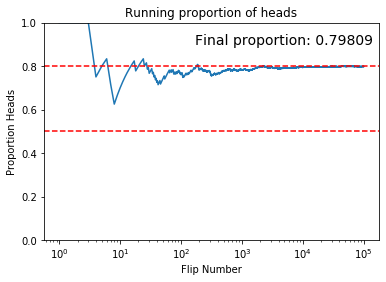

In [39]:
fig, ax = plt.subplots()

ax.semilogx(np.arange(1, N+1), cummean)
ax.axhline(0.5, color="r", linestyle="--")
ax.axhline(0.8, color="r", linestyle="--")
plt.ylim((0, 1))
plt.title("Running proportion of heads")
ax.text(0.45, 0.95, f"Final proportion: {cummean[-1]}", transform=ax.transAxes, fontsize=14, verticalalignment='top')
plt.xlabel("Flip Number")
plt.ylabel("Proportion Heads")

plt.show()

## Exercise 3

**Purpose: To have you work through an example of the logic presented in Section 4.2.1.2.**

Determine the exact probability of drawing a 10 from a shuffled pinochle deck. (In a pinochle deck, there are 48 cards. There are six values: 9, 10, Jack, Queen, King, Ace. There are two copies of each value in each of the standard four suits: hearts, diamonds, clubs, spades.)

**(A)** What is the probability of getting a 10?

**(B)** What is the probability of getting a 10 or Jack?

In [48]:
a = (2*4) / 48
print(f"(A): {a:.3f}")
b = 2 * a
print(f"(B): {b:.3f}")

(A): 0.167
(B): 0.333
